In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

In [3]:
from common import compute_rmse_fraction

In [4]:
import pickle

In [5]:
knn_p= pickle.load(open("predictions/knn_all_homes.pkl","r"))
tensor_custom_p = pickle.load(open("predictions/o_tf.pkl",'r'))['tf']
tensor_custom_static_weather_p = pickle.load(open("predictions/o_tf_energy_static.pkl",'r'))['tf_energy_static']
mf_p = pickle.load(open("predictions/o_mf.pkl",'r'))['mf']

In [6]:
knn= {}
feature='energy_static'
for appliance in knn_p.keys()[:]:
    knn[appliance] = {}
    for feature in ['energy', 'energy_static']:
        print appliance, feature
        best_error = 1e6
        for n in range(1, 10):
            pred = pd.DataFrame(knn_p[appliance][feature][n]).T

            alpha, beta, error, e = compute_rmse_fraction(appliance,pred)
            if error < best_error:
                best_error = error
                knn[appliance][feature] = best_error

hvac energy
hvac energy_static
wm energy
wm energy_static
fridge energy
fridge energy_static
mw energy
mw energy_static
oven energy
oven energy_static
dw energy
dw energy_static


In [7]:
pd.DataFrame(knn)

,dw,fridge,hvac,mw,oven,wm
energy,1.025643,3.767861,23.412383,1.944156,1.140918,0.424438
energy_static,1.044269,3.303662,20.681325,1.876657,1.154699,0.478881


In [8]:
dataset = 'False'
tf_custom= {}
for cost in ['abs','rel']:
    tf_custom[cost]= {}

    for appliance in tensor_custom_p.keys()[:]:
        tf_custom[cost][appliance]= {}
        for case in [str(x) for x in range(1, 5)]:
            print cost, appliance, case
            best_error = 1e6
            for a in [str(x) for x in range(1, 10)]:
                alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_p[appliance][case][a][cost][dataset])
                if error < best_error:
                    best_error = error
                    tf_custom[cost][appliance][case] = best_error

abs hvac 1
abs hvac 2
abs hvac 3
abs hvac 4
abs wm 1
abs wm 2
abs wm 3
abs wm 4
abs fridge 1
abs fridge 2
abs fridge 3
abs fridge 4
abs mw 1
abs mw 2
abs mw 3
abs mw 4
abs oven 1
abs oven 2
abs oven 3
abs oven 4
abs dw 1
abs dw 2
abs dw 3
abs dw 4
rel hvac 1
rel hvac 2
rel hvac 3
rel hvac 4
rel wm 1
rel wm 2
rel wm 3
rel wm 4
rel fridge 1
rel fridge 2
rel fridge 3
rel fridge 4
rel mw 1
rel mw 2
rel mw 3
rel mw 4
rel oven 1
rel oven 2
rel oven 3
rel oven 4
rel dw 1
rel dw 2
rel dw 3
rel dw 4


In [9]:
tensor_custom_p[appliance][case][a][cost][dataset]
appliance

'dw'

In [10]:
pd.DataFrame(tf_custom['abs'])

,dw,fridge,hvac,mw,oven,wm
1,0.983833,3.549308,25.885237,1.858268,1.180908,0.396592
2,1.143432,3.957940,25.791674,2.050480,1.410305,0.430687
3,1.151561,3.919696,25.208624,1.927213,1.204024,0.422099
4,0.998215,3.511995,23.428323,1.849683,1.223426,0.426134


In [11]:
tensor_custom_static_weather_p['hvac']['True']['1']['static']['weather'].keys()

['abs', 'rel']

In [12]:
dataset = 'False'
tf_custom_static_weather= {}
for cost in ['abs']:
    tf_custom_static_weather[cost]= {}

    for appliance in tensor_custom_static_weather_p.keys()[:]:
        tf_custom_static_weather[cost][appliance]= {}
        for static in ['None','static']:
            tf_custom_static_weather[cost][appliance][static] = {}
            for weather in ['None','weather']:
                tf_custom_static_weather[cost][appliance][static][weather] = {}
                print cost, appliance, static, weather
                best_error = 1e6
                for a in [str(x) for x in range(1, 10)]:
                    alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_static_weather_p[appliance][dataset][a][static][weather][cost])
                    if error < best_error:
                        best_error = error
                        tf_custom_static_weather[cost][appliance][static][weather] = best_error

abs hvac None None
abs hvac None weather
abs hvac static None
abs hvac static weather
abs wm None None
abs wm None weather
abs wm static None
abs wm static weather
abs fridge None None
abs fridge None weather
abs fridge static None
abs fridge static weather
abs mw None None
abs mw None weather
abs mw static None
abs mw static weather
abs oven None None
abs oven None weather
abs oven static None
abs oven static weather
abs dw None None
abs dw None weather
abs dw static None
abs dw static weather


In [29]:
pd.DataFrame(tf_custom_static_weather[cost]['oven'])

,None,static
None,1.357404,1.320390
weather,1.221313,1.193866


In [123]:
out = {}
for static in ['None','static']:
    for weather in ['None','weather']:
        out[(static, weather)] =  {}
        for lat in range(1, 10):
            out[(static, weather)][lat] =  compute_rmse_fraction('hvac',tensor_custom_static_weather_p['hvac']['False'][str(lat)][static][weather]['abs'])[2]

In [124]:
%matplotlib inline

In [125]:
pd.DataFrame(out)

None          static        
     None weather    None weather
1  29.196  30.718  22.508  20.898
2  27.715  27.911  20.791  20.672
3  26.538  26.052  19.311  19.621
4  29.034  24.974  19.801  19.182
5  24.528  24.554  19.589  19.815
6  30.482  30.464  22.927  25.940
7  33.808  52.680  26.516  38.066
8  39.430  68.871  37.279  49.332
9  45.557  72.505  50.958  72.723

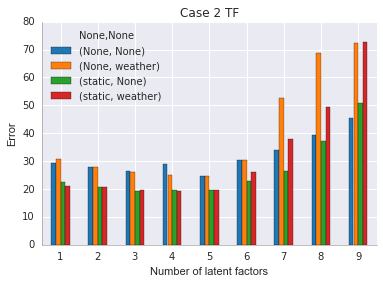

In [126]:
from plot_functions import *
pd.DataFrame(out).plot(kind="bar", rot=0,colors=tableau20blind[::2])
plt.title("Case 2 TF")
format_axes(plt.gca())
plt.ylabel("Error")
plt.xlabel("Number of latent factors")

#### MF

In [113]:
mf_p['hvac']['energy_static']['absolute']['False']['3'].describe()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
count,539.000,539.000,539.000,539.000,539.000,539.000
mean,151.185,345.530,433.333,524.310,332.736,192.859
std,113.662,241.057,303.084,364.626,224.559,132.385
min,16.911,33.528,42.338,50.578,30.115,18.094
25%,62.779,145.463,182.177,221.243,144.966,82.210
50%,134.691,313.335,392.309,476.275,304.265,176.273
75%,202.643,460.890,579.060,698.353,444.922,257.013
max,1170.544,2491.783,3138.656,3785.721,2308.523,1355.038


In [119]:
tensor_custom_p['hvac']['2']['3']['abs']["False"].describe()

,0,1,2,3,4,5
count,539.000,539.000,539.000,539.000,539.000,539.000
mean,189.065,364.374,448.856,534.596,350.741,223.411
std,73.696,122.803,152.166,181.214,117.587,81.397
min,41.533,72.885,87.651,106.793,77.674,44.027
25%,136.160,267.977,324.287,385.136,257.572,163.349
50%,183.607,360.548,451.970,536.431,352.270,221.496
75%,235.949,452.220,551.039,664.591,438.912,278.051
max,449.899,648.557,907.331,1012.451,694.191,500.709


In [42]:
mf_results = {}
dataset = 'False'
for appliance in mf_p:
    mf_results[appliance] = {}
    for feature in ['energy_static','energy']:
        mf_results[appliance][feature] = {}
        for cost in ['absolute']:
            mf_results[appliance][feature][cost] = {}
            least_error = 1000
            for lat in [str(x) for x in range(1, 10)]:
                try:
                    print lat, cost, feature, appliance
                    pred = mf_p[appliance][feature][cost][dataset][lat]
                    gt_f, pred_f, rms,e  = compute_rmse_fraction(appliance, pred)
                    if rms < least_error:
                        least_error = rms
                        best_k = lat
                        print best_k, least_error
                except:
                    pass
            mf_results[appliance][feature][cost] = least_error

1 absolute energy_static hvac
2 absolute energy_static hvac
3 absolute energy_static hvac
3 17.2428962453
4 absolute energy_static hvac
4 14.3021075028
5 absolute energy_static hvac
6 absolute energy_static hvac
7 absolute energy_static hvac
8 absolute energy_static hvac
8 13.0166182945
9 absolute energy_static hvac
1 absolute energy hvac
1 12.7640933676
2 absolute energy hvac
3 absolute energy hvac
4 absolute energy hvac
5 absolute energy hvac
6 absolute energy hvac
7 absolute energy hvac
8 absolute energy hvac
9 absolute energy hvac
9 11.712453226
1 absolute energy_static wm
2 absolute energy_static wm
3 absolute energy_static wm
3 0.433884866727
4 absolute energy_static wm
4 0.415647932101
5 absolute energy_static wm
6 absolute energy_static wm
7 absolute energy_static wm
8 absolute energy_static wm
9 absolute energy_static wm
1 absolute energy wm
1 0.412417939015
2 absolute energy wm
3 absolute energy wm
4 absolute energy wm
5 absolute energy wm
6 absolute energy wm
7 absolute ener

In [44]:
mf_relative = {}
mf_abs = {}
for appliance in mf_results.keys():
    for cost in ['absolute']:
        if cost=="absolute":
            mf_abs[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]
        else:
            mf_relative[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]


In [20]:
pd.DataFrame(mf_relative)

,dw,fridge,hvac,mw,oven,wm
energy,1.362254,4.249840,13.469415,1.990151,1.385642,0.432162
energy_static,0.916223,4.136054,13.952143,2.043962,1.282593,0.421990


In [45]:
pd.DataFrame(mf_abs)

,dw,fridge,hvac,mw,oven,wm
energy,1.048077,4.839685,11.712453,1.934062,1.116397,0.412418
energy_static,0.816300,4.140797,13.016618,1.930631,1.211684,0.415648


In [84]:
(pd.DataFrame(tf_custom_static_weather['abs']).ix['static']).ix['dw']['weather']

0.92612088052485497

In [67]:
pd.DataFrame(tf_custom['abs']).index

Index([u'1', u'2', u'3', u'4'], dtype='object')

In [88]:
 pd.DataFrame(tf_custom['abs']).ix['1']

dw         0.984
fridge     3.549
hvac      25.885
mw         1.858
oven       1.181
wm         0.397
Name: 1, dtype: float64

In [108]:
results_df ={}
results_df[('MF (Abs)','Energy')] = pd.DataFrame(mf_abs).ix['energy']
results_df[('MF (Abs)','Energy+Static')] = pd.DataFrame(mf_abs).ix['energy_static']

#results_df[('MF (Rel)','Energy')] = pd.DataFrame(mf_relative).ix['energy']
#results_df[('MF (Rel)','Energy+Static')] = pd.DataFrame(mf_relative).ix['energy_static']

#results_df[('Tensor (Parafac)','Energy')] = pd.Series(tensor_parafac_results)


results_df[('KNN','Energy')] = pd.DataFrame(knn).ix['energy']
results_df[('KNN','Energy+Static')] = pd.DataFrame(knn).ix['energy_static']
#results_df[('KNN','Oracle')] = pd.Series(knn_oracle)

#results_df[('KNN (ML)','Energy')] = pd.DataFrame(ml_results).ix['energy']
#results_df[('KNN (ML)','Energy+Static')] = pd.DataFrame(ml_results).ix['energy_static']

for case in range(1, 5):
    results_df[('TF-Custom-'+str(case)+" (Abs)",'Energy')] = pd.DataFrame(tf_custom['abs']).ix[str(case)]
    
#for case in range(1, 5):
#    results_df[('TF-Custom-'+str(case)+" (Rel)",'Energy')] = pd.DataFrame(tf_custom_rel).ix[case]

#results_df[('TF-Custom-'+str(4)+" (Abs)",'Energy+Static')] = pd.Series(tf_custom_parafac_static)
#results_df[('TF-Custom-'+str(4)+" (Rel)",'Energy+Static')] = pd.Series(tf_custom_parafac_static_rel)

#results_df[('TF-Custom-'+str(2)+" (Rel)",'Energy+Static+Weather')] = pd.Series(tf_custom_static_weather)
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static+Weather')] = pd.Series(tf_custom_static_weather)
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static')] = pd.Series(tf_custom_static_abs)
#results_df[('TF-Custom-'+str(2)+" (Rel)",'Energy+Static')] = pd.Series(tf_custom_2_static_rel)


results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['static']['None'] for appliance in mf_p})
results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Weather')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['None']['weather'] for appliance in mf_p})
results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static+Weather')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['static']['weather'] for appliance in mf_p})







In [109]:
tf_custom_static_weather['abs']['dw']['None']['None']

1.0737853125087471

In [110]:
pd.DataFrame(results_df)

KNN               MF (Abs)               TF-Custom-1 (Abs)  \
        Energy Energy+Static   Energy Energy+Static            Energy   
dw       1.026         1.044    1.048         0.816             0.984   
fridge   3.768         3.304    4.840         4.141             3.549   
hvac    23.412        20.681   11.712        13.017            25.885   
mw       1.944         1.877    1.934         1.931             1.858   
oven     1.141         1.155    1.116         1.212             1.181   
wm       0.424         0.479    0.412         0.416             0.397   

       TF-Custom-2 (Abs)                                                     \
                  Energy Energy+Static Energy+Static+Weather Energy+Weather   
dw                 1.143         1.051                 0.926          1.199   
fridge             3.958         4.131                 4.396          4.315   
hvac              25.792        19.311                19.182         24.554   
mw                 2.050         2.049                 1.934          1.957   
oven               1.410         1.320                 1.194          1.221   
wm                 0.431         0.435                 0.432          0.636   

       TF-Custom-3 (Abs) TF-Custom-4 (Abs)  
                  Energy            Energy  
dw                 1.152             0.998  
fridge             3.920             3.512  
hvac              25.209            23.428  
mw                 1.927             1.850  
oven               1.204             1.223  
wm                 0.422             0.426

In [111]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: gray' if v else '' for v in is_min]

In [112]:
pd.set_option('precision', 3)
out = pd.DataFrame(results_df).T
out.columns = [str.capitalize(x) for x in out.columns]
import seaborn as sns

cm = sns.light_palette("orange", as_cmap=True)

s = out.style.background_gradient(cmap=cm)
s
#out.style.apply(highlight_min)
#out.style.set_properties(**{'text-align': 'right'})


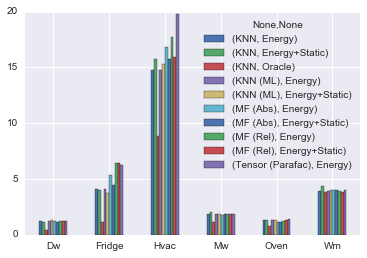

In [24]:
%matplotlib inline
out.T.plot(kind="bar",rot=0)

In [27]:
appliance='hvac'
pred = knn_p[appliance][feature][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

In [42]:
print neighbours
pred = mf_p[appliance][feature]['relative'][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

4


In [55]:
e[e>50]

hvac_6  2378     66.320
hvac_7  9931     55.425
hvac_8  1283     50.375
        4297     53.084
        5109    111.909
        7016     76.824
        9931     57.367
hvac_9  9931     54.087
dtype: float64

In [30]:
pred.ix[7641]

5     181.223
6     501.261
7     667.553
8     816.993
9     486.119
10    298.398
Name: 7641, dtype: float64

In [32]:
gt_f.ix[7641]

hvac_5     40.110
hvac_6     48.855
hvac_7     52.535
hvac_8     55.951
hvac_9     40.766
hvac_10    29.589
Name: 7641, dtype: float64

In [54]:
pred_f[pred_f>60].unstack().dropna()

hvac_6  2378    66.686
hvac_8  936     70.419
        1169    80.873
        3482    70.894
        4922    63.049
        5109    76.167
        7016    77.230
        9134    67.873
dtype: float64

In [36]:
from mf_core import *

import numpy as np
import pandas as pd
import sys
from create_matrix import *
from sklearn.model_selection import LeaveOneOut
from scipy.optimize import nnls

import pickle
from tensor_custom_core import *


APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "Austin"
year = 2014

def un_normalize(x, maximum, minimum):
    return (maximum-minimum)*x + minimum


a, b = 3, 3

print a, b


pred = {}
for appliance in APPLIANCES[:1]:
    pred[appliance] = {}
    if appliance == "hvac":
        start, stop = 5, 11
    else:
        start, stop = 1, 13
    months = stop - start
    pred[appliance] = {}
    appliance_df = create_matrix_all_entries(region, year, appliance)
    aggregate_cols = [x for x in appliance_df.columns if "aggregate" in x]
    appliance_cols = [x for x in appliance_df.columns if appliance in x]
    energy_cols = np.concatenate([aggregate_cols, appliance_cols])

    df = appliance_df.copy()

3 3


In [42]:
df.columns[-3:]

Index([u'area', u'total_occupants', u'num_rooms'], dtype='object')

In [43]:
static_cols = ['area', 'total_occupants', 'num_rooms']
static_df = df[static_cols]
static_df = static_df.div(static_df.max())

In [44]:
static_df

,area,total_occupants,num_rooms
26,0.585,0.8,0.400
222,0.629,1.0,0.267
410,0.371,0.4,0.533
545,0.699,0.4,0.800
624,0.600,0.8,0.467
661,0.475,0.4,0.400
871,0.472,0.8,0.533
936,0.400,0.8,0.533
1169,0.409,0.4,0.400
1334,0.314,0.4,0.333


In [60]:
weather_df = np.ones(len(static_df)).reshape(-1, 1)

In [61]:
weather_df

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])